<a href="https://colab.research.google.com/github/Swetha192004/Animal-Classification-using-Neural-Network-on-Zoo-Dataset/blob/main/logistic_renamed_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("/content/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.duplicated()
df.drop_duplicates()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
a=df.drop(columns = 'education')
a

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
a.isnull().sum()


male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
a.dropna(inplace = True)
print(a.to_string())

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD
0        1   39              0         0.0     0.0                0             0         0    195.0  106.0   70.0  26.97       80.0     77.0           0
1        0   46              0         0.0     0.0                0             0         0    250.0  121.0   81.0  28.73       95.0     76.0           0
2        1   48              1        20.0     0.0                0             0         0    245.0  127.5   80.0  25.34       75.0     70.0           0
3        0   61              1        30.0     0.0                0             1         0    225.0  150.0   95.0  28.58       65.0    103.0           1
4        0   46              1        23.0     0.0                0             0         0    285.0  130.0   84.0  23.10       85.0     85.0           0
5        0   43              0         0.0     0.0                0         

In [ ]:
a.isnull().sum()
from sklearn.linear_model import LogisticRegression

In [ ]:
X = a.drop(columns=['TenYearCHD'])
y = a['TenYearCHD']

y = a.pop('TenYearCHD')
X = a


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(X, y)


LogisticRegression(max_iter=1000)

In [ ]:
def predict_TenYearCHD(user_input):
 input_data = [user_input[col] for col in X.columns]
 prediction = logistic_regression_model.predict([input_data])
 return prediction[0]

In [ ]:
user_input = {}
for feature in X.columns:
 user_input[feature] = input(f"Enter value for {feature}: ")

Enter value for male: 1
Enter value for age: 30
Enter value for currentSmoker: 1
Enter value for cigsPerDay: 0
Enter value for BPMeds: 0
Enter value for prevalentStroke: 0
Enter value for prevalentHyp: 1
Enter value for diabetes: 0
Enter value for totChol: 195
Enter value for sysBP: 106
Enter value for diaBP: 70
Enter value for BMI: 26.97
Enter value for heartRate: 80
Enter value for glucose: 77


In [ ]:
user_input = {key: float(value) if key != 'male' else int(value) for key, value in
user_input.items()}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
def sigmoid(x):
 return 1 / (1 + np.exp(-x))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid_decision_boundary(X, y, model):

    if X.shape[1] != 2:
        raise ValueError("X must have exactly 2 features for 2D visualization")

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(X, y)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(solver='saga', max_iter=1000)

logistic_regression_model.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

pipeline.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression(max_iter=1000))])

In [ ]:
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)


In [ ]:
 y_values = sigmoid(x_values)


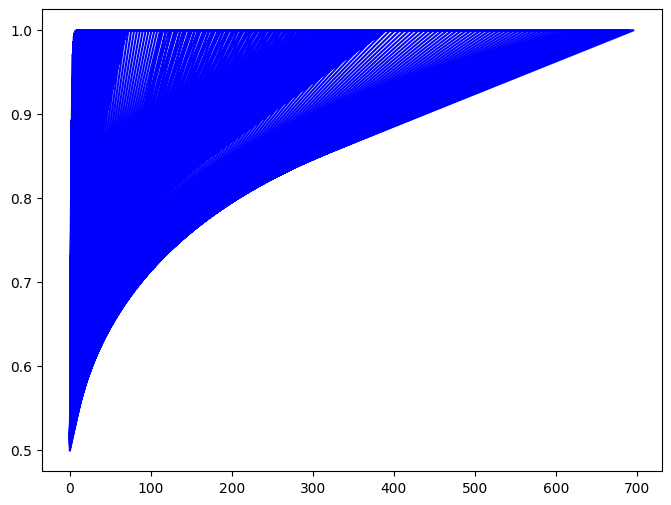

In [ ]:
 plt.figure(figsize=(8, 6))
 plt.plot(x_values, y_values, color='blue', label='Sigmoid Function')

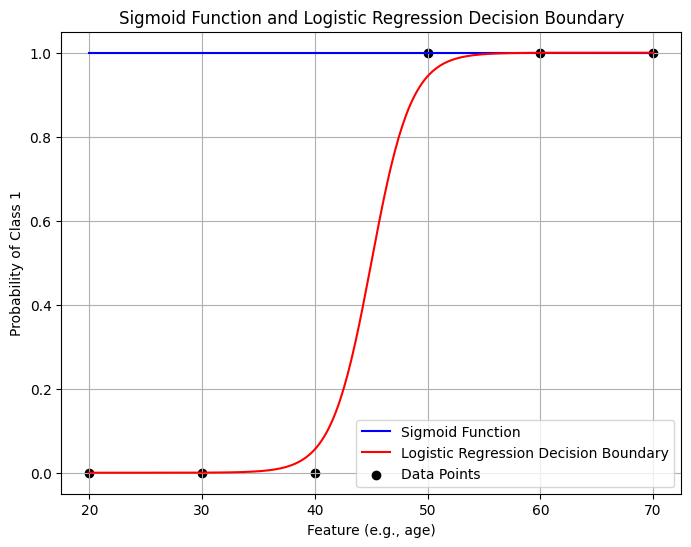

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_sigmoid_and_decision_boundary(X, y, model):
    x_decision_boundary = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

    y_decision_boundary = model.predict_proba(x_decision_boundary)[:, 1]

    plt.figure(figsize=(8, 6))

    plt.plot(x_decision_boundary, sigmoid(x_decision_boundary), color='blue', label='Sigmoid Function')

    plt.plot(x_decision_boundary, y_decision_boundary, color='red', label='Logistic Regression Decision Boundary')

    plt.scatter(X, y, color='black', label='Data Points')  # Plot data points

    plt.xlabel('Feature (e.g., age)')
    plt.ylabel('Probability of Class 1')
    plt.title('Sigmoid Function and Logistic Regression Decision Boundary')
    plt.grid(True)
    plt.legend()
    plt.show()

X = np.array([20, 30, 40, 50, 60, 70]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1])

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X, y)

plot_sigmoid_and_decision_boundary(X, y, logistic_regression_model)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


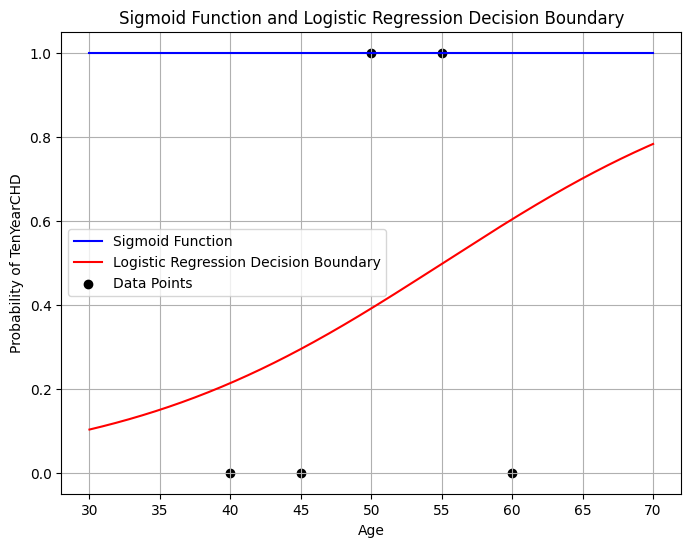

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_sigmoid_decision_boundary(X, y, model):
    x_values = np.linspace(X.min().values - 10, X.max().values + 10, 300).reshape(-1, 1)

    y_proba = model.predict_proba(x_values)[:, 1]

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, sigmoid(x_values), color='blue', label='Sigmoid Function')
    plt.plot(x_values, y_proba, color='red', label='Logistic Regression Decision Boundary')
    plt.scatter(X, y, color='black', label='Data Points')
    plt.xlabel('Age')
    plt.ylabel('Probability of TenYearCHD')
    plt.title('Sigmoid Function and Logistic Regression Decision Boundary')
    plt.grid(True)
    plt.legend()
    plt.show()

data = {
    'age': [40, 50, 60, 45, 55],
    'TenYearCHD': [0, 1, 0, 0, 1]
}

a = pd.DataFrame(data)

X = a[['age']]
y = a['TenYearCHD']

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X, y)

plot_sigmoid_decision_boundary(X, y, logistic_regression_model)
